# PS4: Compute the Profit Diagram for a Jade Lizard at Expiration
The [Jade-Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) is a composite options trade consisting of three option legs. The [Jade-Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) was created by [tasty-traders Liz and Jny](https://www.tastylive.com/shows/tweeting-live-with-liz-jny). A Jade Lizard is a relatively simple and popular option strategy best deployed when the trader has a neutral (i.e., sideways or range-bound) to bullish view of a given security. The [Jade-Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) consists of:
* __Option 1__: 1 $\times$ `short put` contract with strike price $K_{1}$ USD/share and premium $\mathcal{P}_{1}$ USD/share
* __Option 2__: 1 $\times$ `short call` contract with strike price $K_{2}$ USD/share and premium $\mathcal{P}_{2}$ USD/share
* __Option 3__: 1 $\times$ `long call` contract with strike price $K_{3}>K_{2}$ USD/share and premium $\mathcal{P}_{3}$ USD/share

## Learning objectives
The objective of `PS4` is to familiarize students with constructing profit diagrams at expiration for typical composite options contracts, i.e., the [Jade-Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard).

* __Task 1__: Create the option contract models for the `Jade Lizard`
    * `TODO`: Create `short put`, `short call`, and `long call` contract models using the strike prices and premiums provided below
* __Task 2__: Compute the profit array at expiration for the `Jade Lizard`
    * `TODO`: Build an array of share prices at expiration from `45.0` to `85.0` (already completed for you)
    * `TODO`: Compute the profit array at expiration using the `profit(...)` function.
* __Task 3__: Compute the properties of the `Jade Lizard`
    * `TODO`: Compute the breakeven point at expiration for the trade
    * `TODO`: Compute the maximum profit and maximum loss for the trade
    
### Other resources
There are several examples of computing a composite contract’s profit (loss) at expiration in the `L9a` lecture examples and the `L9b` lab. 
* Examples: https://github.com/varnerlab/CHEME-5660-Examples-F23.git
* Labs: https://github.com/varnerlab/CHEME-5660-Labs-F23.git

## Setup
We load the [VLQuantitativeFinancePackage.jl](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl) package, and several other external [Julia](https://julialang.org/downloads/https://julialang.org/downloads/) packages, as well as some helper code, by calling the [include(...)](https://docs.julialang.org/en/v1/manual/code-loading/https://docs.julialang.org/en/v1/manual/code-loading/) command on the file `Include.jl`:

In [3]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/PS3-CHEME-5660-JadeLizard-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/PS3-CHEME-5660-JadeLizard-Fall-2023/Manifest.toml`
  Activating project at `~/Desktop/julia_work/PS3-CHEME-5660-JadeLizard-Fall-2023`
  No Changes to `~/Desktop/julia_work/PS3-CHEME-5660-JadeLizard-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/PS3-CHEME-5660-JadeLizard-Fall-2023/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/PS3-CHEME-5660-JadeLizard-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/PS3-CHEME-5660-JadeLizard-Fall-2023/Manifest.toml`


### Strikes and Option prices

In [15]:
strike_price_array = [
    60.0 ; # 1 short put
    65.0 ; # 2 short call
    70.0 ; # 4 long call
];

option_premium_array = [
    4.95 ; # 1 short put
    3.85 ; # 2 short call
    2.25 ; # 3 long call
];

## Task 1: Create the option contract models for the `Jade Lizard`
We can construct the contract models using the `build(...)` method. To do the profit diagram calculation at expiration, we need to pass in a few pieces of information into the `build(...)` method:

* The profit diagram calculation requires passing the strike price `K`, the `premium` value, the `sense`, and the number of contracts in the `copy` parameter into the `build(...)` method for each contract model.

For example, to construct a model of the short put leg of the trade, we issue the command (`sense = -1` means short):

In [16]:
short_put_model = build(MyAmericanPutContractModel, (
    K = strike_price_array[1] , premium = option_premium_array[1], sense = -1, copy = 1
));

Construct the `short call` leg of the trade, save this model in the `short_call_model` variable:

In [8]:
short_call_model = nothing # TODO Fill me in

Construct the `long call` leg of the trade, save this model in the `long_call_model` variable (`sense = 1` means long):

In [7]:
long_call_model = nothing # TODO Fill me in

## Task 2: Compute the profit array at expiration for the `Jade Lizard`
Next, we generate an array of share prices at expiration and store them in the `S` array (we've already done this for you):

In [5]:
S = range(45.0, stop = 85.0, length = 1000) |> collect; # nothing to do here, move along ...

Finally, we can compute the `profit` for the [Jade Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) by calling the `profit(...)` function. 
* Pass in an array of contract models as the first argument and the array of share prices at expiration `S` as the second argument to the `profit(…)` function. The `profit(…)` function returns an array holding the share price at expiration in `col 1`, the P/L for each leg in `col 2 ... col C`, and the overall P/L in the last column. Each row corresponds to a different share price at expiration.

Let's store the output from the `profit(...)` function in the `profit_array` variable:

In [6]:
profit_array = nothing; # TODO fill me in

### Visualize
We plot the share price at expiration versus the profit with the help of `plot(...)` functions from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package:

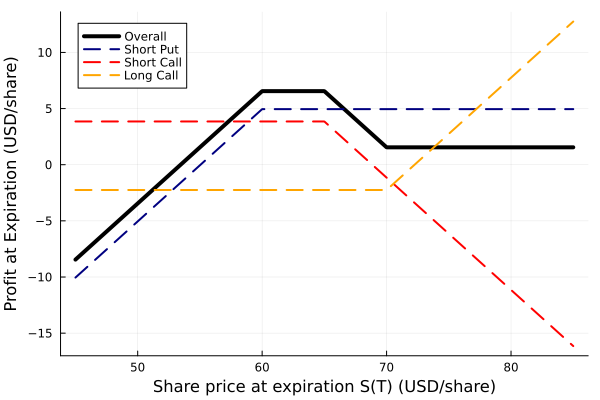

In [30]:
plot(profit_array[:,1], profit_array[:,end], lw=4, c=:black, label="Overall")
plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Short Put", c=:navyblue, ls=:dash)
plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Short Call", c=:red, ls=:dash)
plot!(profit_array[:,1], profit_array[:,4], lw=2, label="Long Call", c=:orange, ls=:dash)
xlabel!("Share price at expiration S(T) (USD/share)", fontsize=18)
ylabel!("Profit at Expiration (USD/share)", fontsize=18)

## Task 3: Compute the properties of the `Jade Lizard`
* `TODO`: Compute the breakeven point at expiration for the trade 
    * Develop an analytical expression for the break-even, check your analytical value using the P/L graph
* `TODO`: Compute the maximum profit and maximum loss for the trade
    * Develop an analytical expression for the maximum profit, check your value using the P/L graph

## Disclaimer and Risks

__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team.

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance. Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.